<a href="https://colab.research.google.com/github/TLARSONPHARMD/PortfolioProjects/blob/main/Bank_Churn_Prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Objective 1**

Import & QA the data
Your first objective is to import & join two customer data tables, then remove duplicate rows & columns and fill in missing values.

In [2]:
#read in data dictionary file to get a feel for the meanings of the data in our columns
data_dict = pd.read_csv('/content/Bank_Churn_Data_Dictionary.csv')

data_dict

,Field,Description
0,CustomerId,A unique identifier for each customer
1,Surname,The customer's last name
2,CreditScore,A numerical value representing the customer's ...
3,Geography,The country where the customer resides (France...
4,Gender,The customer's gender (Male or Female)
5,Age,The customer's age
6,Tenure,The number of years the customer has been with...
7,Balance,The customer's account balance
8,NumOfProducts,The number of bank products the customer uses ...
9,HasCrCard,Whether the customer has a credit card (1 = ye...


In [3]:
#Import the customer data from the "Bank_Churn_Messy" Excel file
customer_data = pd.read_excel('/content/Bank_Churn_Messy.xlsx')

customer_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [4]:
#Import the account data from the "Bank_Churn_Messy" Excel file
account_data = pd.read_excel('/content/Bank_Churn_Messy.xlsx', sheet_name=1)

account_data.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [5]:
#Use a left join to join "Account_Info" to "Customer_Info" using the CustomerID column
churn_df = customer_data.merge(account_data, how='left', on='CustomerId')

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [6]:
#Inspect the data to Check for duplicate rows and columns
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
#remove duplicate rows and columns and rename Tenure_x for clarity
churn_df = churn_df.drop('Tenure_y', axis=1).rename({'Tenure_x':'Tenure'}, axis=1).drop_duplicates()

churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0


In [8]:
#further check for and remove duplicate rows and columns
churn_df.duplicated(keep=False).count()

10000

In [9]:
churn_df = churn_df.drop_duplicates()

**Objective 2**

Clean the data
Your second objective is to clean the data by fixing inconsistencies in labeling, handling erroneous values, and fixing currency fields.

In [10]:
#Check the data types for each column and make any necessary fixes
churn_df.dtypes

,0
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,float64
Tenure,int64
EstimatedSalary,object
Balance,object
NumOfProducts,int64


In [11]:
#Remove string value from Estimated Salary Column and convert to float dtype
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].str.replace('€','').astype(float)

churn_df['EstimatedSalary'].head()

,EstimatedSalary
0,NaN
2,112542.58
3,113931.57
4,93826.63
5,79084.10


In [12]:
#Remove string value from Balance Column and convert to float dtype
churn_df['Balance'] = churn_df['Balance'].str.replace('€','').astype(float)

churn_df['Balance'].head()

,Balance
0,0.00
2,83807.86
3,159660.80
4,0.00
5,125510.82


In [13]:
churn_df[churn_df.isna().any(axis=1) ==True]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,NaN,0.00,1,Yes,Yes,1
29,15728693,NaN,574,Germany,Female,NaN,3,-999999.0,141349.43,1,Yes,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,6,-999999.0,120193.42,1,No,No,0
9390,15756954,NaN,538,France,Female,NaN,2,-999999.0,0.00,1,Yes,Yes,0


In [14]:
#Replace missing values in categorical columns with "MISSING", and missing values in numeric columns with the median
churn_df = churn_df.fillna(value={'Surname':'Missing', 'Age': churn_df['Age'].median()})

In [15]:
#Profile the numeric columns in the data. Are there any extreme or non-sensical values? If so, impute them with the median of the column.
churn_df.describe()

,CustomerId,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,9999.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921500,5.012800,99762.036605,76485.889288,1.530200,0.203700
std,7.193619e+04,96.653299,10.487552,2.892174,60586.891225,62397.405202,0.581654,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,-999999.000000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,50909.945000,0.000000,1.000000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,100183.050000,97198.540000,1.000000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,149392.065000,127644.240000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,199992.480000,250898.090000,4.000000,1.000000


In [16]:
churn_df['EstimatedSalary'] = churn_df['EstimatedSalary'].replace(-999999.00, churn_df['EstimatedSalary'].median())
churn_df['EstimatedSalary'].head()

,EstimatedSalary
0,NaN
2,112542.58
3,113931.57
4,93826.63
5,79084.10


In [17]:
#Combine any variations in country names in the "Geography" column to a single value per country
churn_df['Geography'] = np.where(churn_df['Geography'].isin(['France','French','FRA']),'France', churn_df['Geography'])

In [18]:
#verify that the fix worked
churn_df['Geography'].value_counts().reset_index()

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


**Objective 3**

Explore the data
Your third objective is to explore the target variable and look at feature-target relationships for categorical and numeric fields.


<Axes: xlabel='Exited'>

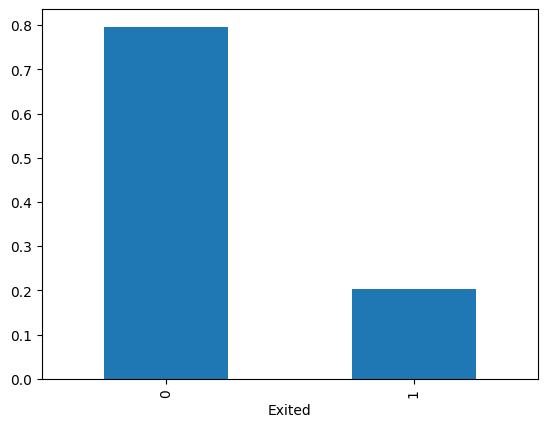

In [19]:
#Build a bar chart displaying the count of churners (Exited=1) vs. non-churners (Exited=0)
churn_df.Exited.value_counts(normalize=True).plot.bar()

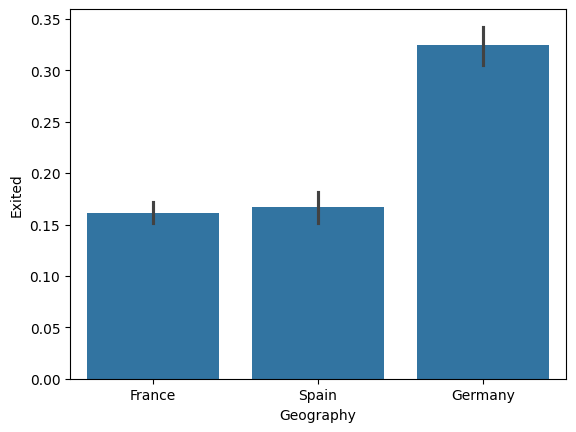

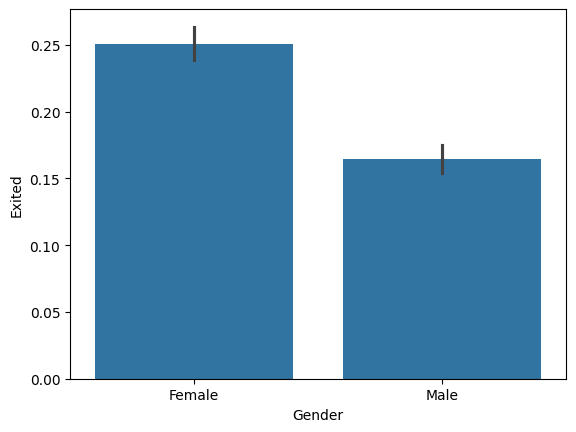

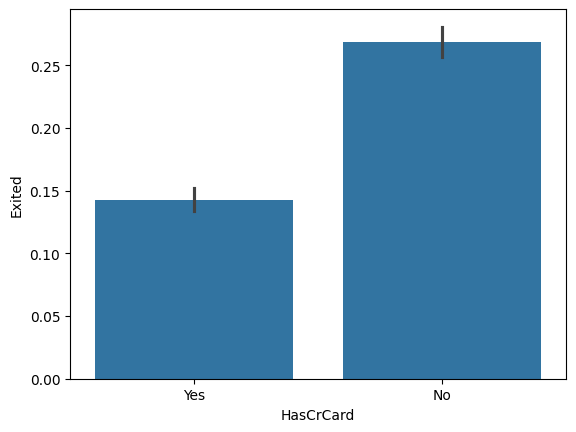

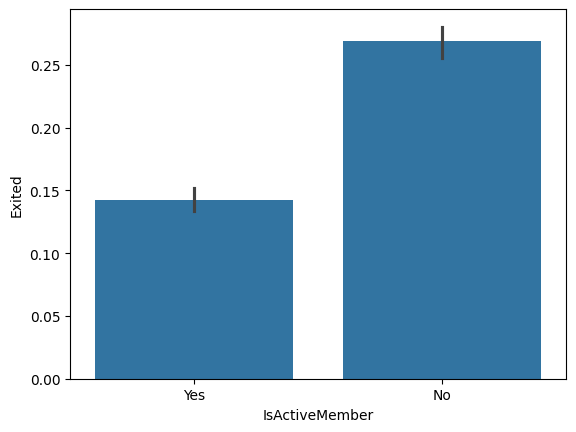

In [20]:
#Explore the categorical variables vs. the target, and look at the percentage of Churners by “Geography” and “Gender”
categor_variables = ['Geography','Gender']

for col in churn_df.select_dtypes('object').drop('Surname',axis=1):
  sns.barplot(data=churn_df, x=col, y='Exited')
  plt.show()

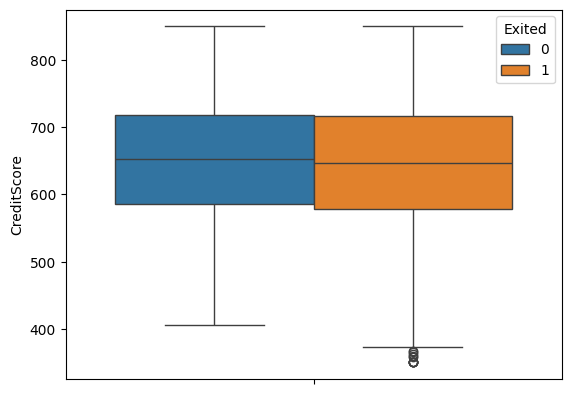

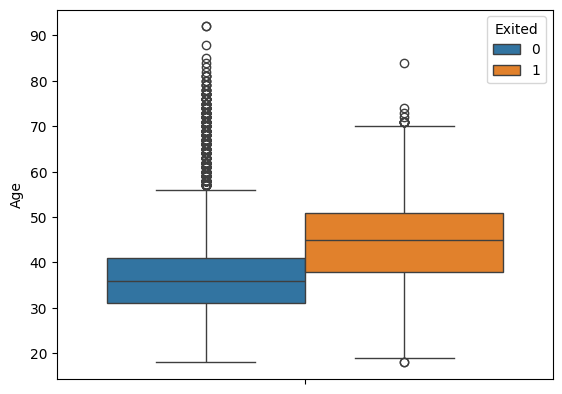

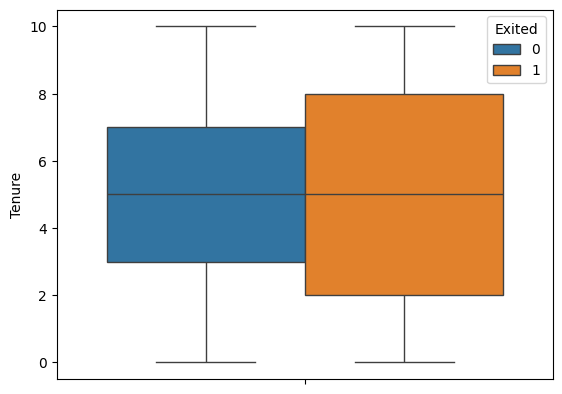

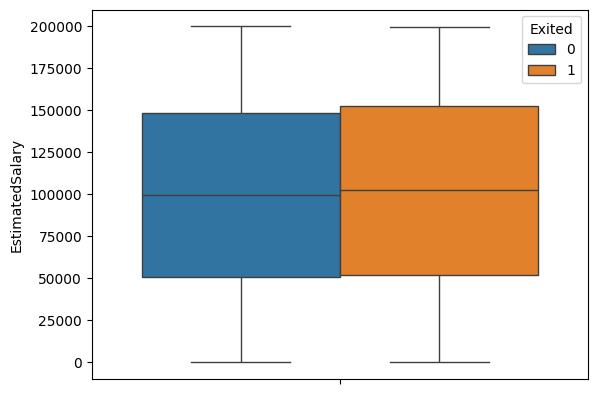

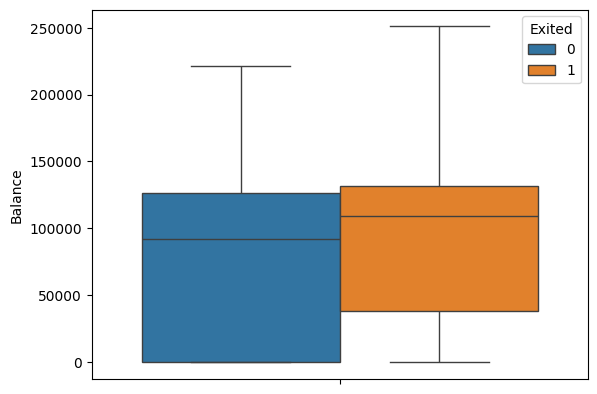

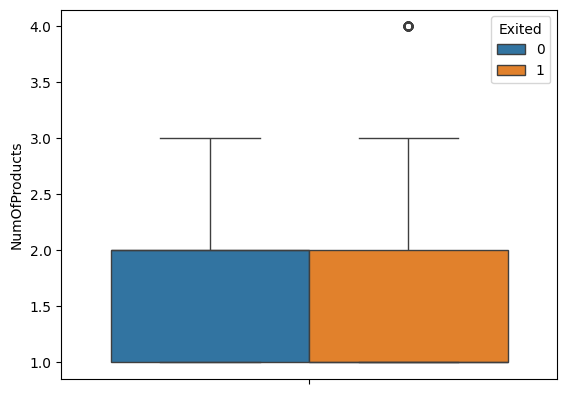

In [21]:
#create a boxplot of the numerical values vs churn
for col in churn_df.select_dtypes('number').drop(['Exited','CustomerId'],axis=1):
  sns.boxplot(churn_df, y=col, hue='Exited')
  plt.show()

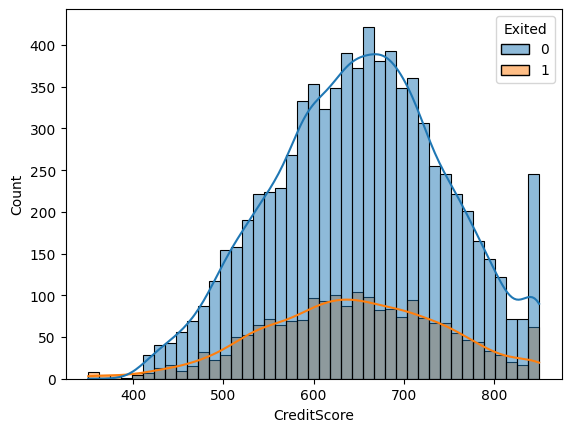

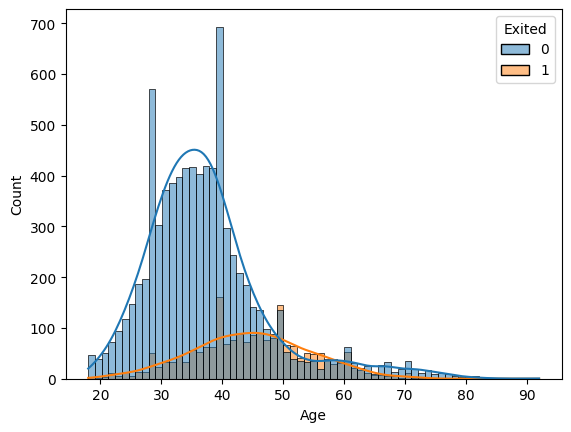

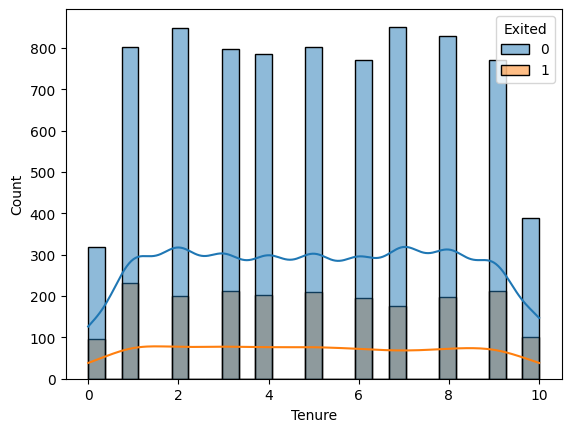

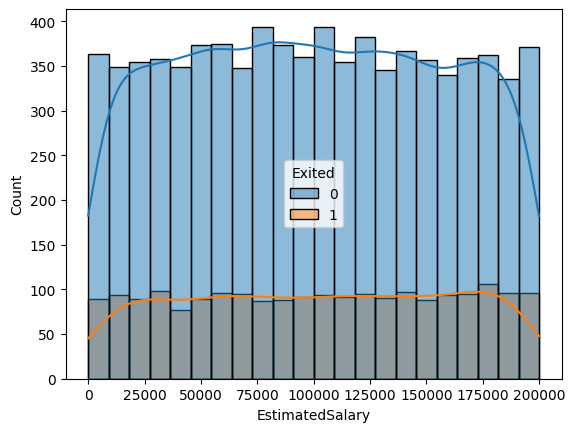

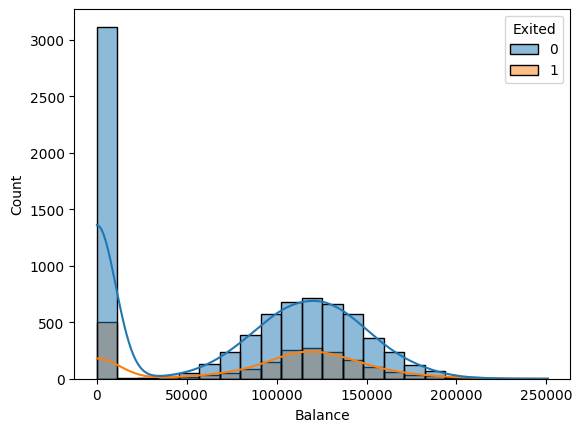

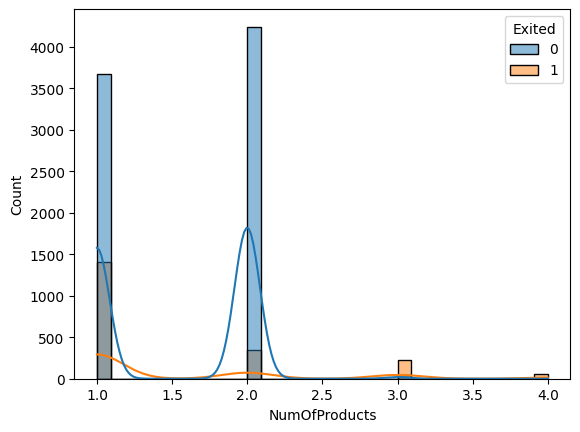

In [22]:
#create a histogram of the numerical values vs churn
for col in churn_df.select_dtypes('number').drop(['Exited','CustomerId'],axis=1):
  sns.histplot(churn_df, x=col, hue='Exited',kde=True)
  plt.show()

In [23]:
#Create a new dataset that excludes any columns that aren’t be suitable for modeling
model_df = churn_df.drop(['CustomerId','Surname'],axis=1)
model_df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,France,Female,42.0,2,NaN,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [24]:
#Create dummy variables for categorical fields
model_df = pd.get_dummies(model_df,drop_first=True)
model_df.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,Exited,Geography_Germany,Geography_Spain,Gender_Male,HasCrCard_Yes,IsActiveMember_Yes
0,619,42.0,2,NaN,0.00,1,1,False,False,False,True,True
2,608,41.0,1,112542.58,83807.86,1,0,False,True,False,True,True
3,502,42.0,8,113931.57,159660.80,3,1,False,False,False,False,False
4,699,39.0,1,93826.63,0.00,2,0,False,False,False,False,False
5,850,43.0,2,79084.10,125510.82,1,0,False,True,False,True,True


In [25]:
#Create new feature "balance_v_income"
model_df['balance_v_income'] = model_df['Balance']/model_df['EstimatedSalary']

<Axes: ylabel='balance_v_income'>

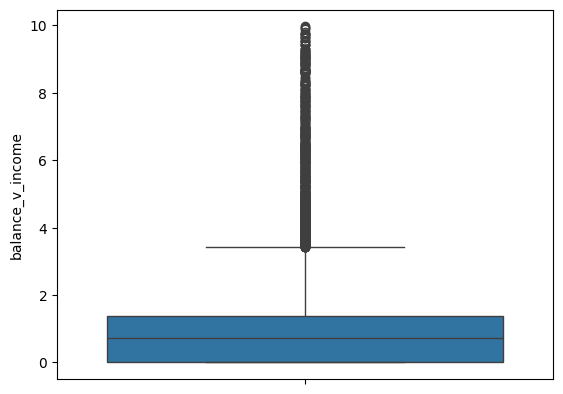

In [26]:
#visualize balance_v_income vs churn status
sns.boxplot(model_df.query('balance_v_income < 10'), y='balance_v_income')

<Axes: ylabel='balance_v_income'>

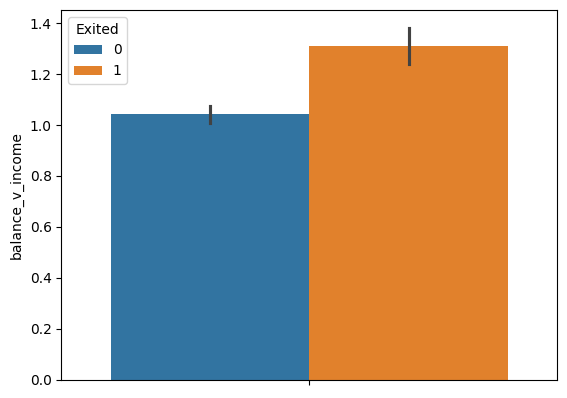

In [27]:
sns.barplot(model_df.query('balance_v_income < 10'), y='balance_v_income', hue='Exited')